### Read in RMSE data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
df = pd.DataFrame(pd.read_csv("rmse_cos1.txt", sep=" "))
#df=df[df['lengthscale']<=0.3]
df.shape

(400, 4)

### Make data frame in order

In [2]:
order = pd.DataFrame(pd.read_csv("rmse_cos1115.txt", sep=" "))
order = order.sort_values(by=['lengthscale', 'l2regularizer'])
order = order.reset_index(drop=True)
with open("rmse_cos1.txt", 'a') as f:
    dfAsString = order.to_string(header=False, index=False)
    f.write(dfAsString)
order

,lengthscale,l2regularizer,rmse_mean,rmse_std
0,0.05,0.05,1.110289,0.523206
1,0.05,0.10,1.164181,0.541546
2,0.05,0.15,1.149480,0.534770
3,0.05,0.20,1.156613,0.540239
4,0.05,0.25,1.160259,0.543572
...,...,...,...,...
392,1.00,0.75,0.954857,0.479911
393,1.00,0.80,0.954936,0.479140
394,1.00,0.85,0.953689,0.480189
395,1.00,0.90,0.952641,0.479240


In [9]:
#find the missing one
for i in np.unique(df['lengthscale']):
    #print exact lengthscale dataframe's shape
    print(df[df['lengthscale']==i].shape)
print(df[df['lengthscale']==0.25])

(20, 4)
(20, 4)
(20, 4)
(20, 4)
(20, 4)
(20, 4)
(20, 4)
(20, 4)
(20, 4)
(20, 4)
(20, 4)
(20, 4)
(20, 4)
(20, 4)
(20, 4)
(20, 4)
(20, 4)
(20, 4)
(20, 4)
(20, 4)
    lengthscale  l2regularizer  rmse_mean  rmse_std
80         0.25           0.05   0.817357  0.298998
81         0.25           0.10   0.818197  0.296827
82         0.25           0.15   0.789841  0.319369
83         0.25           0.20   0.820320  0.303088
84         0.25           0.25   0.802294  0.309551
85         0.25           0.30   0.812719  0.305341
86         0.25           0.35   0.807677  0.310303
87         0.25           0.40   0.969176  0.637569
88         0.25           0.45   0.970183  0.638207
89         0.25           0.50   0.813892  0.316960
90         0.25           0.55   0.813892  0.316960
91         0.25           0.60   0.805320  0.328621
92         0.25           0.65   0.814118  0.323540
93         0.25           0.70   0.810796  0.328026
94         0.25           0.75   0.810539  0.327430
95      

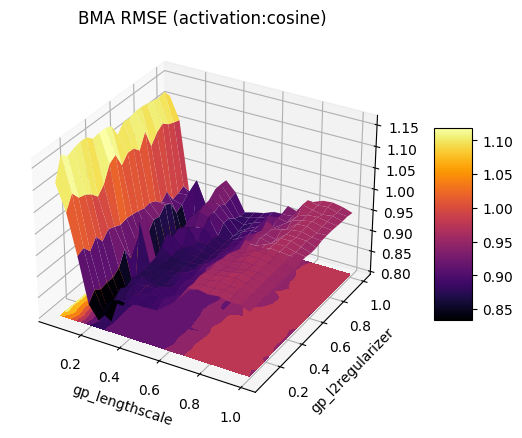

In [10]:
fig = plt.figure(figsize= (10,5))
rmse_mean_plot = df['rmse_mean'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')
x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_mean_plot, cmap='inferno', 
                       edgecolor ='none')


fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BMA RMSE (activation:cosine)')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_mean_plot,
                zdir ='z',
                offset = 0.8,
                cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0.8, np.max(rmse_mean_plot))
# show plot
plt.show()

In [11]:
df[df['rmse_mean']==np.min(df['rmse_mean'])]

,lengthscale,l2regularizer,rmse_mean,rmse_std
82,0.25,0.15,0.789841,0.319369


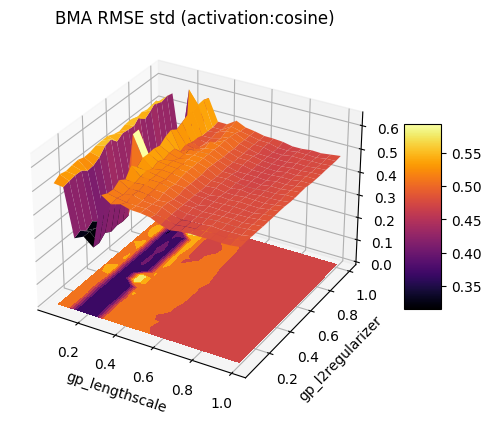

In [12]:
rmse_std_plot = df['rmse_std'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')
x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_std_plot, cmap='inferno', 
                       edgecolor ='none')
fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BMA RMSE std (activation:cosine)')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_std_plot,
                zdir ='z',
                 offset = 0,
                   cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0, np.max(rmse_std_plot))
# show plot
plt.show()

In [13]:
df = pd.DataFrame(pd.read_csv("bma_relu_rmse.txt", sep=" "))
df.shape

(1560, 4)

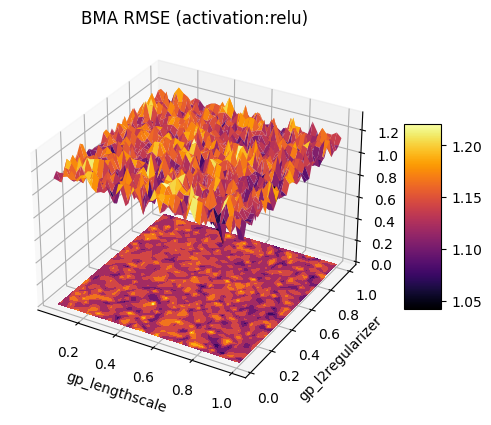

In [23]:
rmse_mean_plot = df['rmse_mean'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')
x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_mean_plot, cmap='inferno', 
                       edgecolor ='none')
fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BMA RMSE (activation:relu)')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_mean_plot,
                zdir ='z',
                 offset = 0,
                   cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0, np.max(rmse_mean_plot))
# show plot
plt.show()

In [ ]:
df[df['rmse_mean']==np.min(df['rmse_mean'])]

In [50]:
rmse_std_plot = df['rmse_std'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')
x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_std_plot, cmap='inferno', 
                       edgecolor ='none')
fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BMA RMSE std (activation:relu)')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_std_plot,
                zdir ='z',
                 offset = 0,
                   cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0, np.max(rmse_std_plot))
# show plot
plt.show()

<IPython.core.display.Javascript object>